In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
805,ham,I dled 3d its very imp,NaN,NaN,NaN
1284,ham,But if she.s drinkin i'm ok.,NaN,NaN,NaN
3421,spam,Freemsg: 1-month unlimited free calls! Activat...,NaN,NaN,NaN
5200,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
1423,ham,Lol great now im getting hungry.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployement

# 1 .Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1379,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
4498,spam,"SMS SERVICES. for your inclusive text credits,..."
4297,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...
4978,ham,Spending new years with my brother and his fam...
4255,ham,Aah! A cuddle would be lush! I'd need lots of ...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
2760,ham,I dont thnk its a wrong calling between us
2107,ham,Hmmm ... And imagine after you've come home fr...
1770,ham,Dont show yourself. How far. Put new pictures ...
3432,ham,Christmas is An occasion that is Celebrated as...
2354,ham,R we going with the &lt;#&gt; bus?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

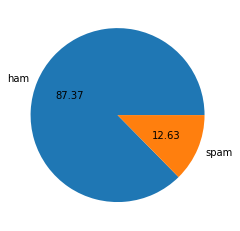

In [22]:
import matplotlib.pyplot as plt
plt.pie( df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f" )
plt.show()

In [23]:
# Data is imbalanced

In [24]:
import nltk

In [25]:
# nltk.download("punkt")

In [26]:
#count the number of character of sms
df['num_character'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#count the number of in sms
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
 df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# count the number of senetences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#this is for ham messages
df[df['target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#this is for spam 
df[df['target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

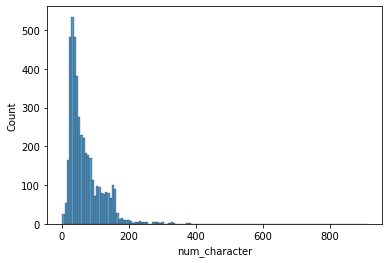

In [36]:
sns.histplot(df[df['target']==0]['num_character'])

<AxesSubplot:xlabel='num_character', ylabel='Count'>

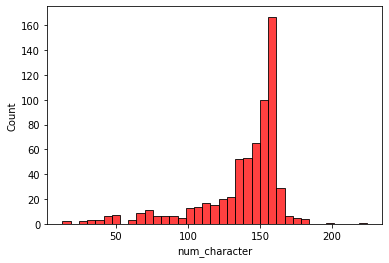

In [37]:
sns.histplot(df[df['target']==1]['num_character'],color='red')

<AxesSubplot:xlabel='num_character', ylabel='Count'>

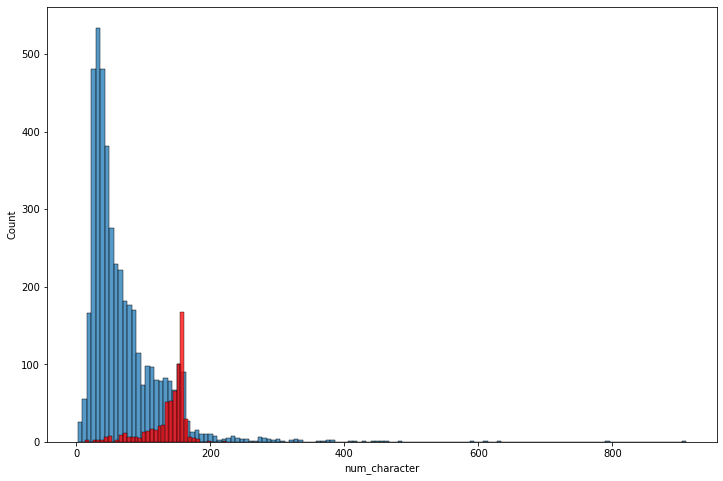

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

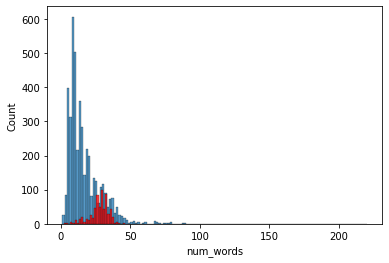

In [39]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')


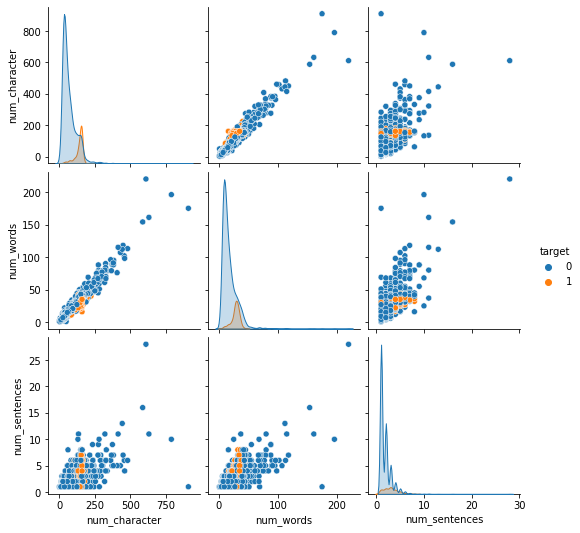

In [40]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

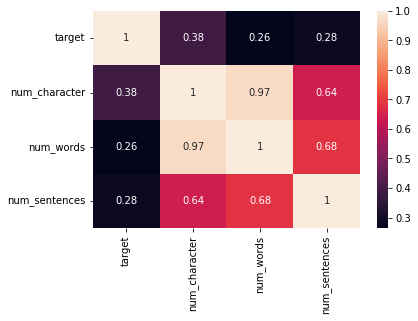

In [41]:
sns.heatmap(df.corr(),annot=True)

#  3.Data Preprocessing
<ul>
    <li>Lower case</li>
    <li>Tokenization</li>
    <li>Removing special characters</li>
    <li>Removing stop words and punctuation</li>
    <li>Stemming</li>
 </ul>

In [42]:
# nltk.download('stopwords')

In [43]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [44]:
def transform_text(text):
    text=text.lower() #convert text in lower 
    text=nltk.word_tokenize(text) #tokenizing the word
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i) # remove special character
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return ' '.join(y)

In [45]:
# Removing stop words and punctuation
 
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
transform_text('I loved the YT lectures on Machine Learning .How about you?')

'love yt lectur machin learn'

In [48]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [49]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
#!conda install -c conda-forge wordcloud

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

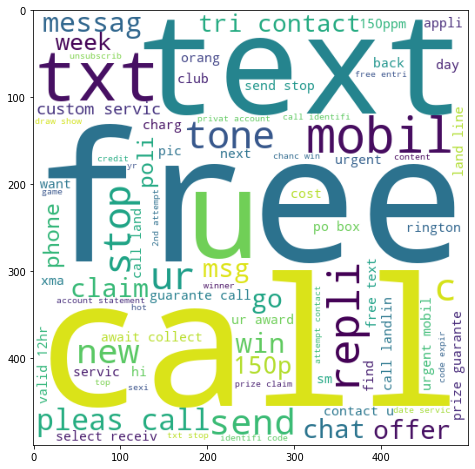

In [55]:
plt.figure(figsize=(18,8))
plt.imshow(spam_wc)


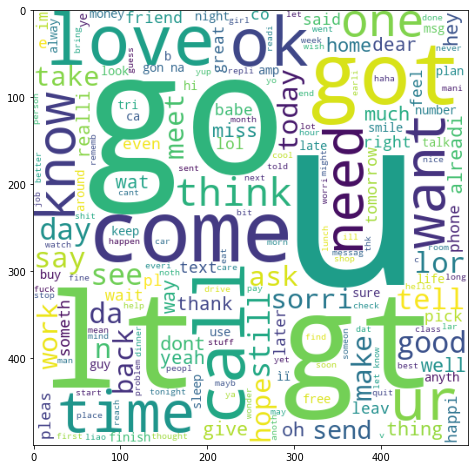

In [56]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(18,8))
plt.imshow(ham_wc)


In [57]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
#dispaly top spam most common word
spam_corpus = []
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [59]:
len(spam_corpus)

9939

In [60]:
from collections import Counter

In [61]:
#dispaly top spam most common word
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\ksawa\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


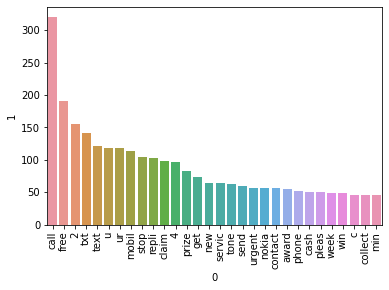

In [62]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [63]:
#dispaly top  most common ham word
ham_corpus = []
for msg in df[df['target'] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

35394

C:\Users\ksawa\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


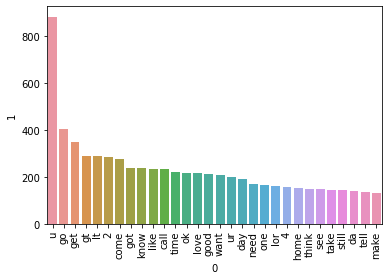

In [65]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [66]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4 Model Building

In [126]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [127]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
#X=np.hstack((X,df['num_character'].values.reshape(-1,1)))

In [118]:
X.shape

(5169, 3000)

In [119]:
y = df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [135]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [136]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
 

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [143]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [87]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#tfidf --> MNB

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from  xgboost import XGBClassifier
from pandas import MultiIndex, Int64Index

C:\Users\ksawa\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\ksawa\AppData\Local\Temp/ipykernel_12820/3871966139.py:12: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
#!conda install -c conda-forge xgboost

In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [140]:
clfs={'SVC':svc,
      'KN':knc,
      'NB':mnb,
      'DT':dtc,
      'LR':lrc,
      'RF':rfc,
      'AdaBoost':abc,
      'BgC':bc,
      'ETC':etc,
      'GBDT':gbdt,
      'xgb':xgb
     }

In [141]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [92]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [93]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92


C:\Users\ksawa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [95]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [96]:
performance_df1 = pd.melt(performance_df,id_vars = 'Algorithm')

In [97]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


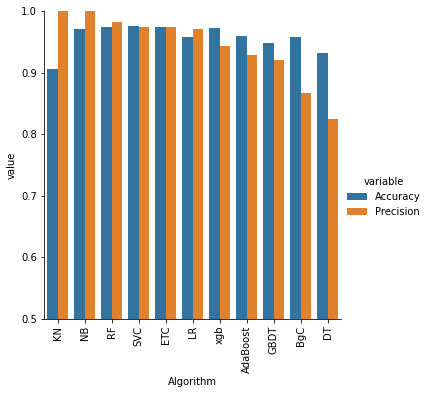

In [98]:
sns.catplot(x = 'Algorithm',y = 'value',
           hue = 'variable',data=performance_df1, kind = 'bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improvement
# 1 change the max_features parameter of TfIdf

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [100]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [101]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [102]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [103]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [104]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [106]:
#voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [107]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [108]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [109]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [110]:
#Applying stacking
estimators=[('svm',svc), ('nb',mnb), ('et',etc)]
final_estimator=RandomForestClassifier()

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [113]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [ ]:
# we are using multinomial naive base model that is our best performing model

In [114]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))